<a href="https://colab.research.google.com/github/vivithaarumugam/C-T-Bank_sample_submission/blob/main/CAR_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [ ]:
df=pd.read_csv("/content/CarPrice_Assignment.csv")


In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape


(205, 26)

In [ ]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

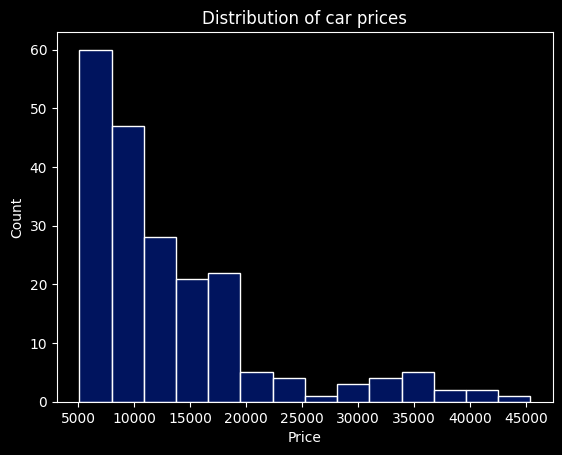

In [ ]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(df['price'])
plt.title('Distribution of car prices',color='white')
plt.xlabel('Price',color='white')
plt.ylabel('Count',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

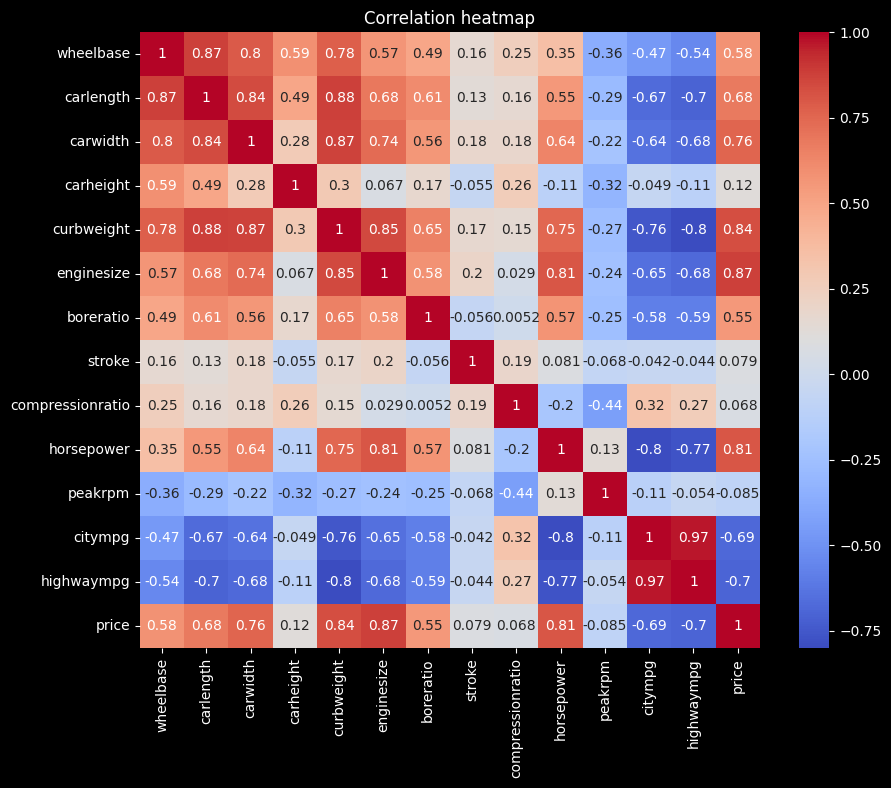

In [ ]:
numeric_features=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
                 'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
correlation_matrix=df[numeric_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation heatmap',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [ ]:
feature_columns = df.drop('price', axis=1)
target_column='price'
x=feature_columns
y=df[target_column]

In [ ]:
label_encoder=LabelEncoder()
for col in x.columns:
    if x[col].dtype =='object':
        x[col] = label_encoder.fit_transform(x[col])


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions=model.predict(x_test)
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
print('Root Mean Squared Error:',rmse)

Root Mean Squared Error: 3508.008167455512


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
import pandas as pd

#New data
new_car_data = [[1, 3, 'alfa-romero giulia', 'gas', 'std', 'two', 'convertible', 'rwd', 'front',
                 88.6, 168.8, 64.1, 48.8, 2548, 'dohc', 'four', 130, 'mpfi', 3.47, 2.68, 9.0, 111, 5000, 21, 27]]

# Define the column names based on the original dataset's columns
new_car_columns = ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
                   'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
                   'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
                   'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
                   'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

# Create a DataFrame with the data and column names
new_car_df = pd.DataFrame(new_car_data, columns=new_car_columns)

# Drop the 'CarName' column as it's not needed for prediction
new_car_df.drop(columns=['CarName'], inplace=True)

# Encode categorical columns (one-hot encoding)
new_car_encoded = pd.get_dummies(new_car_df, drop_first=True)

#"Aligning and Preparing New Car Data for Prediction with Trained Model"

new_car_encoded = new_car_encoded.reindex(columns=x_train.columns, fill_value=0)

# Predict the car price using the model
predicted_price = model.predict(new_car_encoded)

# Ensure the predicted price is positive
predicted_price = max(0, predicted_price)  # Ensure the price is not negative

print('Predicted_price:', predicted_price)